# **LAB 2 - PART 2 SVR**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
import yfinance as yf

### **Retrieve the Financial Data**

Historical stock prices for a set of stocks, foreign exchange rates, and key market indices.

Ticker:

- stock tickers : `stk_tickers = ['MSFT', 'IBM', 'GOOGL']`
- foreign exchange tickers : `ccy_tickers = ['DEXJPUS', 'DEXUSUK']`
- market index tickers : `idx_tickers = ['SP500', 'DJIA', 'VIXCLS']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `yf.download()`
- `web.DataReader()`
</details>


In [3]:
### START CODE HERE ###
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = yf.download(stk_tickers,start='2018-12-31', end='2023-12-31')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')
### END CODE HERE ###

[*********************100%%**********************]  3 of 3 completed


### **Exploring the Data**


In [4]:
stk_data

Adj Close                               Close              \
                 GOOGL         IBM        MSFT       GOOGL         IBM   
Date                                                                     
2018-12-31   52.248001   85.148720   96.450592   52.248001  108.671127   
2019-01-02   52.734001   86.302322   96.023254   52.734001  110.143402   
2019-01-03   51.273499   84.579414   92.490761   51.273499  107.944550   
2019-01-04   53.903500   87.882889   96.792435   53.903500  112.160614   
2019-01-07   53.796001   88.504616   96.915901   53.796001  112.954109   
...                ...         ...         ...         ...         ...   
2023-12-22  141.490005  162.139999  374.579987  141.490005  162.139999   
2023-12-26  141.520004  163.210007  374.660004  141.520004  163.210007   
2023-12-27  140.369995  163.460007  374.070007  140.369995  163.460007   
2023-12-28  140.229996  163.750000  375.279999  140.229996  163.750000   
2023-12-29  139.690002  163.550003  376.040009  139.690002  163.550003   

                              High                                 Low  \
                  MSFT       GOOGL         IBM        MSFT       GOOGL   
Date                                                                     
2018-12-31  101.570000   53.149502  109.321220  102.400002   51.652000   
2019-01-02  101.120003   53.039501  110.879539  101.750000   51.264000   
2019-01-03   97.400002   53.313000  109.827919  100.190002   51.118500   
2019-01-04  101.930000   54.000000  112.323135  102.510002   51.842999   
2019-01-07  102.059998   54.134998  113.604210  103.269997   53.132000   
...                ...         ...         ...         ...         ...   
2023-12-22  374.579987  141.990005  162.410004  375.179993  140.710007   
2023-12-26  374.660004  142.679993  163.309998  376.940002  141.190002   
2023-12-27  374.070007  142.080002  163.639999  375.059998  139.889999   
2023-12-28  375.279999  141.139999  163.960007  376.459991  139.750000   
2023-12-29  376.040009  140.360001  164.179993  377.160004  138.779999   

                                          Open                          \
                   IBM        MSFT       GOOGL         IBM        MSFT   
Date                                                                     
2018-12-31  107.476097  100.440002   52.891499  108.346077  101.290001   
2019-01-02  106.778206   98.940002   51.360001  107.084129   99.550003   
2019-01-03  107.734222   97.199997   52.533501  109.493309  100.099998   
2019-01-04  109.407265   98.930000   52.127998  109.856598   99.720001   
2019-01-07  111.539200  100.980003   54.048500  112.332695  101.639999   
...                ...         ...         ...         ...         ...   
2023-12-22  161.000000  372.709991  140.770004  161.100006  373.679993   
2023-12-26  162.050003  373.500000  141.589996  162.229996  375.000000   
2023-12-27  162.679993  372.809998  141.589996  163.139999  373.690002   
2023-12-28  163.399994  374.160004  140.779999  163.960007  375.369995   
2023-12-29  162.830002  373.480011  139.630005  163.750000  376.000000   

              Volume                     
               GOOGL      IBM      MSFT  
Date                                     
2018-12-31  33110000  5212009  33173800  
2019-01-02  31868000  4434935  35329300  
2019-01-03  41960000  4546648  42579100  
2019-01-04  46022000  4683779  44060600  
2019-01-07  47446000  3923755  35656100  
...              ...      ...       ...  
2023-12-22  26514600  2439800  17091100  
2023-12-26  16780300  1772400  12673100  
2023-12-27  19628600  3234600  14905400  
2023-12-28  16045700  2071300  14327000  
2023-12-29  18727200  2525600  18723000  

[1259 rows x 18 columns]

In [5]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2019-01-21,NaN,NaN
2019-01-22,109.34,1.2955
2019-01-23,109.44,1.3074
2019-01-24,109.72,1.3027
2019-01-25,109.60,1.3176
...,...,...
2024-01-08,143.89,1.2766
2024-01-09,144.35,1.2720
2024-01-10,145.68,1.2730


In [6]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2019-01-21,NaN,NaN,NaN
2019-01-22,2632.90,24404.48,20.80
2019-01-23,2638.70,24575.62,19.52
2019-01-24,2642.33,24553.24,18.89
2019-01-25,2664.76,24737.20,17.42
...,...,...,...
2024-01-15,NaN,NaN,13.25
2024-01-16,4765.98,37361.12,13.84
2024-01-17,4739.21,37266.67,14.79


Let's

- `base` be stk_data's `'Adj Close'` and `'MSFT'`<br>
- `X1` be `stk_data`'s `'Adj Close'` and `('GOOGL','IBM')`<br>
- `X2` be `ccy_data`<br>
- `X3` be `idx_data`


In [7]:
### START CODE HERE ###
base = stk_data['Adj Close']['MSFT']
X1 = stk_data['Adj Close'][['GOOGL', 'IBM']]
X2 = ccy_data
X3 = idx_data
### END CODE HERE ###

Create lagged and differenced features for time series analysis<br>

- `Y` : difference price of `'Adj Close', 'MSFT'` for past `n` days.
- `X4_[k]DT` : difference price of `'Adj Close', 'MSFT'` for past or next `[k]*n` days. Please select 3 values for `k`.
  Concatenate the resulting features `X4_[k[0]]DT`, `X4_[k[1]]DT`, `X4_[k[2]]DT` into a single feature set `X4`. Finally, standardize the values in `X4`.<br>
  (See detail explanation in lab direction)

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.diff()`
- `.shift()`
</details>


In [8]:
### START CODE HERE ###
return_period = 3
k = [3,6,12]

Y = base.shift(-return_period)
### Choose calculation of difference price either past (Guide#1) or next (Guide#2) 

### Guide#1 for using price of past [k]*n days
X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(k[0]*return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(k[1]*return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(k[2]*return_period)})

### Guide#2 for using price of next [k]*n days
X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(k[0]*return_period).shift(-k[0]*return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(k[1]*return_period).shift(-k[1]*return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(k[2]*return_period).shift(-k[2]*return_period)})


X4 = pd.concat([X4_3DT,X4_6DT,X4_12DT],axis=1)

### END CODE HERE ###

**Standardize `X1-4`**

**_NOTE:_** Please ensure that each of **_X1-4's index columns_** is the **_date column_**.


In [9]:
### START CODE HERE ###
standard_scaler = preprocessing.StandardScaler()
X1 = pd.DataFrame(standard_scaler.fit_transform(X1),index=X1.index,columns=X1.columns)
X2 = pd.DataFrame(standard_scaler.fit_transform(X2),index=X2.index,columns=X2.columns)
X3 = pd.DataFrame(standard_scaler.fit_transform(X3),index=X3.index,columns=X3.columns)
X4 = pd.DataFrame(standard_scaler.fit_transform(X4),index=X4.index,columns=X4.columns)
### END CODE HERE ###

Concatenate `X1-4` to `X` by index. Then concatenate `X` and `Y` to `dataset` by index.

**_NOTE:_** Please ensure that each of **_X1-3's index columns_** is the **_date column_**.


In [10]:
### START CODE HERE ###
X = pd.concat([X1,X2,X3,X4],axis=1)
dataset = pd.concat([X,Y],axis=1)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

| Date       | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500     | DJIA      | VIXCLS    | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
| ---------- | ------------------ | ---------------- | --------- | --------- | --------- | --------- | --------- | -------- | -------- | --------- | ----------------- |
| 2018-12-31 | -1.545378          | -1.993072        | -0.652377 | -0.107177 | -1.966763 | -1.936393 | 0.492393  | 0.455826 | 3.333092 | 9.376259  | 96.792442         |
| 2019-01-01 | NaN                | NaN              | NaN       | NaN       | NaN       | NaN       | NaN       | NaN      | NaN      | NaN       | NaN               |
| 2019-01-02 | -1.529007          | -1.918422        | -0.684528 | -0.3554   | -1.961748 | -1.931557 | 0.224562  | 3.693924 | 1.728264 | 10.394836 | 96.915886         |
| 2019-01-03 | -1.578206          | -2.029912        | -0.761557 | -0.302747 | -2.05974  | -2.10151  | 0.496045  | 7.577789 | 8.52739  | 14.661652 | 97.618576         |
| 2019-01-04 | -1.48961           | -1.816142        | -0.746821 | -0.141777 | -1.927197 | -1.909175 | 0.000558  | 3.978821 | 2.373985 | 10.178764 | 99.014511         |
| ...        | ...                | ...              | ...       | ...       | ...       | ...       | ...       | ...      | ...      | ...       | ...               |
| 2023-12-22 | 1.46086            | 2.989076         | 1.551328  | -0.171865 | 1.577892  | 1.683629  | -1.015981 | NaN      | NaN      | NaN       | 375.279999        |
| 2023-12-25 | NaN                | NaN              | NaN       | NaN       | NaN       | NaN       | NaN       | NaN      | NaN      | NaN       | NaN               |
| 2023-12-26 | 1.46187            | 3.058317         | NaN       | NaN       | 1.60962   | 1.724664  | -1.020851 | NaN      | NaN      | NaN       | NaN               |
| 2023-12-27 | 1.42313            | 3.074495         | NaN       | NaN       | 1.620391  | 1.753295  | -1.089026 | NaN      | NaN      | NaN       | NaN               |
| 2023-12-28 | 1.418414           | 3.09326          | NaN       | NaN       | 1.623182  | 1.767092  | NaN       | NaN      | NaN      | NaN       | NaN               |

</details>


In [11]:
dataset

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
2018-12-31,-1.545902,-1.988830,NaN,NaN,NaN,NaN,NaN,-0.138107,-0.041556,0.064539,96.792435
2019-01-02,-1.529536,-1.914430,NaN,NaN,NaN,NaN,NaN,0.152494,-0.145501,0.113607,96.915901
2019-01-03,-1.578717,-2.025547,NaN,NaN,NaN,NaN,NaN,0.501039,0.294884,0.319149,97.618591
2019-01-04,-1.490155,-1.812494,NaN,NaN,NaN,NaN,NaN,0.178059,-0.103676,0.103199,99.014503
2019-01-07,-1.493775,-1.772396,NaN,NaN,NaN,NaN,NaN,0.302477,-0.213159,0.090819,98.378265
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15,NaN,NaN,NaN,NaN,NaN,NaN,-0.974057,NaN,NaN,NaN,NaN
2024-01-16,NaN,NaN,NaN,NaN,1.567136,1.641930,-0.902570,NaN,NaN,NaN,NaN
2024-01-17,NaN,NaN,NaN,NaN,1.524659,1.617548,-0.787463,NaN,NaN,NaN,NaN
2024-01-18,NaN,NaN,NaN,NaN,1.590874,1.669678,-0.867432,NaN,NaN,NaN,NaN


**Drop NA**

Drop NA from `dataset`.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
DatetimeIndex: 1207 entries, 2018-12-31 to 2023-11-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   (Adj Close, GOOGL)  1207 non-null   float64
 1   (Adj Close, IBM)    1207 non-null   float64
 2   DEXJPUS             1207 non-null   float64
 3   DEXUSUK             1207 non-null   float64
 4   SP500               1207 non-null   float64
 5   DJIA                1207 non-null   float64
 6   VIXCLS              1207 non-null   float64
 7   MSFT_3DT            1207 non-null   float64
 8   MSFT_6DT            1207 non-null   float64
 9   MSFT_12DT           1207 non-null   float64
 10  (Adj Close, MSFT)   1207 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB
```

<br>

| Statistic | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS     | DEXUSUK     | SP500       | DJIA        | VIXCLS      | MSFT_3DT    | MSFT_6DT    | MSFT_12DT   | (Adj Close, MSFT) |
| --------- | ------------------ | ---------------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------------- |
| count     | 1207.000000        | 1207.000000      | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000       |
| mean      | -0.035934          | -0.076293        | -0.048627   | 0.010266    | -0.038274   | -0.038135   | 0.032071    | 2.003695    | 4.026331    | 8.035808    | 228.156289        |
| std       | 0.990693           | 0.898243         | 0.967200    | 1.011495    | 0.987860    | 0.988187    | 1.006162    | 11.217826   | 15.534667   | 20.737484   | 70.323041         |
| min       | -1.578206          | -2.638620        | -1.133307   | -3.206211   | -2.391674   | -3.155777   | -1.197376   | -33.900146  | -52.498260  | -60.695969  | 96.792442         |
| 25%       | -0.995937          | -0.771499        | -0.759213   | -0.719462   | -1.006790   | -0.968910   | -0.631888   | -3.104721   | -4.466766   | -1.814156   | 165.381950        |
| 50%       | 0.007967           | -0.093102        | -0.598791   | 0.029723    | 0.217450    | 0.238699    | -0.194228   | 2.514923    | 4.754410    | 9.164612    | 238.217758        |
| 75%       | 0.814595           | 0.512558         | 0.890217    | 0.725501    | 0.808928    | 0.821986    | 0.480219    | 8.710037    | 13.093704   | 20.562767   | 284.131805        |
| max       | 1.742090           | 2.083764         | 2.144788    | 2.036573    | 1.644014    | 1.532654    | 7.464517    | 35.238464   | 48.708038   | 72.977844   | 362.464325        |

</details>


In [12]:
### START CODE HERE ###
dataset = dataset.dropna()
### END CODE HERE ###
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1195 entries, 2019-01-22 to 2023-11-07
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GOOGL      1195 non-null   float64
 1   IBM        1195 non-null   float64
 2   DEXJPUS    1195 non-null   float64
 3   DEXUSUK    1195 non-null   float64
 4   SP500      1195 non-null   float64
 5   DJIA       1195 non-null   float64
 6   VIXCLS     1195 non-null   float64
 7   MSFT_3DT   1195 non-null   float64
 8   MSFT_6DT   1195 non-null   float64
 9   MSFT_12DT  1195 non-null   float64
 10  MSFT       1195 non-null   float64
dtypes: float64(11)
memory usage: 112.0 KB


,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,-0.020207,-0.058884,-0.063259,0.011514,-0.056235,-0.057632,0.042984,0.002026,0.004930,-0.000210,229.678425
std,0.983976,0.884978,0.961237,1.016653,0.980592,0.978162,1.006121,1.012141,1.011103,1.003976,69.482617
min,-1.556374,-2.632217,-1.145468,-3.205301,-2.445118,-3.203279,-1.181250,-3.221309,-3.657798,-3.311001,97.599586
25%,-0.954628,-0.759189,-0.776304,-0.737430,-1.030187,-0.993794,-0.625102,-0.463974,-0.550224,-0.481738,168.918495
50%,0.023352,-0.074950,-0.612599,0.035048,0.192858,0.215828,-0.186484,0.046800,0.059007,0.056355,238.754166
75%,0.818814,0.522201,0.868697,0.736071,0.786346,0.788182,0.491436,0.610363,0.599989,0.609803,285.107620
max,1.740315,2.074342,2.098139,2.037326,1.615660,1.496988,7.439654,2.983387,2.897416,3.128371,368.921234


Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.


In [13]:
### START CODE HERE ###
#Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.
Y = dataset['MSFT']
X = dataset.drop(['MSFT'],axis=1)
X
### END CODE HERE ###

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2019-01-22,-1.489212,-1.561275,-0.693457,0.182474,-1.817554,-1.702787,-0.059260,-0.173900,-0.101217,0.042832
2019-01-23,-1.479481,-1.060287,-0.686830,0.361490,-1.808351,-1.658608,-0.214352,-0.135550,-0.167644,0.056355
2019-01-24,-1.480171,-1.077678,-0.668272,0.290786,-1.802591,-1.664385,-0.290686,-0.193499,-0.170866,0.155945
2019-01-25,-1.450690,-1.008109,-0.676225,0.514933,-1.767000,-1.616896,-0.468799,-0.340928,-0.090930,0.115249
2019-01-28,-1.487141,-0.993617,-0.702736,0.487855,-1.800179,-1.670844,-0.293109,-0.128733,0.133978,0.204881
...,...,...,...,...,...,...,...,...,...,...
2023-11-01,0.952741,1.791839,2.065001,-1.063120,0.729136,0.587002,-0.535439,1.988364,2.160515,1.020023
2023-11-02,0.987762,1.894509,2.033188,-0.990912,0.855950,0.732726,-0.682049,1.800315,1.765708,0.915709
2023-11-03,1.041977,1.951265,1.958957,-0.691548,0.920309,0.790097,-0.772923,1.982410,1.480009,0.671913
2023-11-06,1.080701,2.019499,1.986131,-0.665974,0.932432,0.799013,-0.775347,1.081173,0.953913,0.550882


**Calculate the Correlation**

1. Drop columns that have correlation more than 0.9.
2. Show Dropped Columns


In [14]:
### START CODE HERE ###
corr = X.corr()
#columns that have correlation > 0.9
high_corr = np.where(corr > 0.9)
high_list = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.9:
            colname = corr.columns[i]
            high_list.append(colname)
high_list = list(set(high_list))
print(f'Columns that have correlation > 0.9: {high_list}')
X = X.drop(high_list,axis=1)



### END CODE HERE ###

Columns that have correlation > 0.9: ['DJIA', 'SP500']


In [15]:
X

,GOOGL,IBM,DEXJPUS,DEXUSUK,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2019-01-22,-1.489212,-1.561275,-0.693457,0.182474,-0.059260,-0.173900,-0.101217,0.042832
2019-01-23,-1.479481,-1.060287,-0.686830,0.361490,-0.214352,-0.135550,-0.167644,0.056355
2019-01-24,-1.480171,-1.077678,-0.668272,0.290786,-0.290686,-0.193499,-0.170866,0.155945
2019-01-25,-1.450690,-1.008109,-0.676225,0.514933,-0.468799,-0.340928,-0.090930,0.115249
2019-01-28,-1.487141,-0.993617,-0.702736,0.487855,-0.293109,-0.128733,0.133978,0.204881
...,...,...,...,...,...,...,...,...
2023-11-01,0.952741,1.791839,2.065001,-1.063120,-0.535439,1.988364,2.160515,1.020023
2023-11-02,0.987762,1.894509,2.033188,-0.990912,-0.682049,1.800315,1.765708,0.915709
2023-11-03,1.041977,1.951265,1.958957,-0.691548,-0.772923,1.982410,1.480009,0.671913
2023-11-06,1.080701,2.019499,1.986131,-0.665974,-0.775347,1.081173,0.953913,0.550882


### **Train/Test Model**


**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 70% of data for training and last 30% for testing.


In [16]:
### START CODE HERE ###
test_size = 0.3
train_size = 0.7
X_train, X_test = X[:int(len(X)*train_size)], X[int(len(X)*train_size):]
Y_train, Y_test = Y[:int(len(Y)*train_size)], Y[int(len(Y)*train_size):]
### START CODE HERE ###

**Initialize models**

- `Linear Regression`
- `Support Vector Regression` which `kernels` are `['linear','rbf','poly']` and `C` value are `[0.1, 1, 10, 100]`
- `Linear Regression` with `Gradient Descent` from `Lab2-2`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>


In [17]:
### START CODE HERE ###

model_L= LinearRegression()
params = {'kernel':['linear','rbf','poly'], 'C':[0.1, 1, 10, 100], 'gamma': 0.01, 'degree': 2}
model_SVR = []
for k in range(len(params['kernel'])):
    for c in range(len(params['C'])):
        model_SVR.append(SVR(kernel=params['kernel'][k], C=params['C'][c], gamma=params['gamma'], degree=params['degree']))

#multivariate feature of X
def gradient_descent(x:list, y, theta_0, vector_weights, alpha, iteration, verbose=False):
    """gradient_descent function
    Args:
        x (list): Dataframe of input
        y (_type_): label
        theta_0 (_type_): bias
        vector_weights (_type_): Weights of each feature
        alpha (_type_): learning rate
        iteration (_type_): number of iteration
        verbose (bool, optional): logging. Defaults to False.

    Returns:
        _type_: _description_
    """
    theta_his = []
    theta_0_his = []
    
    for i in range(iteration):
        h_before = np.dot(x, vector_weights) + theta_0
        error = y - h_before
        gradient = np.dot(x.T, error) * (-2/x.shape[0])
        vector_weights -= alpha * gradient
        theta_0 -= alpha * sum(error) * (-2/x.shape[0])
        theta_his.append(vector_weights)
        theta_0_his.append(theta_0)
        if verbose:
            print(f'Iteration: {i}, Error: {error.mean()}')
    return theta_his, theta_0_his


### END CODE HERE ###

**Train models**

Train all models with at least two X's columns.

<span style='color: orange;'>**BONUS POINTS**</span> for those who train with more than two or all X's columns.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.fit()`
- For the gradient descent, you'll need to perform multivariate gradient descent by yourself. Vectorizing or using matrices might make things easier.
</details>


In [18]:
### START CODE HERE ###
y = dataset['MSFT']
x = X

theta_0 = 0.4
w = np.random.rand(1, X.shape[1])
w = w[0]
alpha = 0.01
gradient_descent(x, y, theta_0, w, alpha, 2000, True)

model_L.fit(X_train, Y_train)

for i in range(len(model_SVR)):
    model_SVR[i].fit(X_train, Y_train)






### END CODE HERE ###

Iteration: 0, Error: 229.3405119607942
Iteration: 1, Error: 224.83288120534223
Iteration: 2, Error: 220.4122528998246
Iteration: 3, Error: 216.07701978389423
Iteration: 4, Error: 211.82560094343913
Iteration: 5, Error: 207.6564415419878
Iteration: 6, Error: 203.56801254584016
Iteration: 7, Error: 199.55881044357872
Iteration: 8, Error: 195.62735696057715
Iteration: 9, Error: 191.7721987690887
Iteration: 10, Error: 187.9919071944627
Iteration: 11, Error: 184.28507791800578
Iteration: 12, Error: 180.65033067697328
Iteration: 13, Error: 177.08630896214876
Iteration: 14, Error: 173.59167971344056
Iteration: 15, Error: 170.16513301390017
Iteration: 16, Error: 166.8053817825406
Iteration: 17, Error: 163.5111614663107
Iteration: 18, Error: 160.2812297315592
Iteration: 19, Error: 157.11436615530027
Iteration: 20, Error: 154.00937191657295
Iteration: 21, Error: 150.96506948816818
Iteration: 22, Error: 147.9803023289783
Iteration: 23, Error: 145.05393457720714
Iteration: 24, Error: 142.184850744

**Evaluate models**

Evaluate models with test set

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.predict()`
</details>


In [19]:
### START CODE HERE ###
#Evaluate Model
Y_pred_L = model_L.predict(X_test)
Y_pred_SVR = []
for i in range(len(model_SVR)):
    Y_pred_SVR.append(model_SVR[i].predict(X_test))

res_vec_w , res_bias = gradient_descent(x, y, theta_0, w, alpha, 2000, True)
last_vec_w = res_vec_w[-1]
last_bias = res_bias[-1]

Y_pred_GD = np.dot(X_test, last_vec_w) + last_bias
### END CODE HERE ###

Iteration: 0, Error: 231.31264027958417
Iteration: 1, Error: 226.64064863594425
Iteration: 2, Error: 222.064821134359
Iteration: 3, Error: 217.58310314669023
Iteration: 4, Error: 213.19348709990348
Iteration: 5, Error: 208.89401126926455
Iteration: 6, Error: 204.6827586074668
Iteration: 7, Error: 200.55785560844495
Iteration: 8, Error: 196.5174712046816
Iteration: 9, Error: 192.55981569685719
Iteration: 10, Error: 188.68313971473987
Iteration: 11, Error: 184.8857332082535
Iteration: 12, Error: 181.16592446770287
Iteration: 13, Error: 177.52207917217393
Iteration: 14, Error: 173.95259946516487
Iteration: 15, Error: 170.4559230565394
Iteration: 16, Error: 167.03052234992765
Iteration: 17, Error: 163.6749035947339
Iteration: 18, Error: 160.38760606194097
Iteration: 19, Error: 157.16720124293235
Iteration: 20, Error: 154.0122920705817
Iteration: 21, Error: 150.9215121618874
Iteration: 22, Error: 147.89352508145652
Iteration: 23, Error: 144.92702362516854
Iteration: 24, Error: 142.020729123

**Compare MSE from all models**


In [20]:
### START CODE HERE ###
print("--------MSE--------")
print("Linear Regression:            ",metrics.mean_squared_error(Y_test,Y_pred_L))
print("SVR (kernel:linear) (C:0.1):  ", metrics.mean_squared_error(Y_test,Y_pred_SVR[0]))
print("SVR (kernel:linear) (C:1):    ", metrics.mean_squared_error(Y_test,Y_pred_SVR[1]))
print("SVR (kernel:linear) (C:10):   ", metrics.mean_squared_error(Y_test,Y_pred_SVR[2]))
print("SVR (kernel:linear) (C:100):  ", metrics.mean_squared_error(Y_test,Y_pred_SVR[3]))
print("SVR (kernel:rbf) (C:0.1):     ", metrics.mean_squared_error(Y_test,Y_pred_SVR[4]))
print("SVR (kernel:rbf) (C:1):       ", metrics.mean_squared_error(Y_test,Y_pred_SVR[5]))
print("SVR (kernel:rbf) (C:10):      ", metrics.mean_squared_error(Y_test,Y_pred_SVR[6]))
print("SVR (kernel:rbf) (C:100):     ", metrics.mean_squared_error(Y_test,Y_pred_SVR[7]))
print("SVR (kernel:poly) (C:0.1):    ", metrics.mean_squared_error(Y_test,Y_pred_SVR[8]))
print("SVR (kernel:poly) (C:1):      ", metrics.mean_squared_error(Y_test,Y_pred_SVR[9]))
print("SVR (kernel:poly) (C:10):     ", metrics.mean_squared_error(Y_test,Y_pred_SVR[10]))
print("SVR (kernel:poly) (C:100):    ", metrics.mean_squared_error(Y_test,Y_pred_SVR[11]))
print("Linear Gradient Descent:      ", metrics.mean_squared_error(Y_test.values.ravel(),Y_pred_GD))

### END CODE HERE ###

--------MSE--------
Linear Regression:             5761.991481462292
SVR (kernel:linear) (C:0.1):   3851.3020832641523
SVR (kernel:linear) (C:1):     4191.1538118700555
SVR (kernel:linear) (C:10):    5345.427380184244
SVR (kernel:linear) (C:100):   5884.420003047818
SVR (kernel:rbf) (C:0.1):      7128.598032478581
SVR (kernel:rbf) (C:1):        4871.913155507658
SVR (kernel:rbf) (C:10):       3615.7880267634655
SVR (kernel:rbf) (C:100):      4037.7661759257608
SVR (kernel:poly) (C:0.1):     7426.5552582689525
SVR (kernel:poly) (C:1):       7400.808919719359
SVR (kernel:poly) (C:10):      7127.4172022876755
SVR (kernel:poly) (C:100):     7111.735679996635
Linear Gradient Descent:       564.9192459995232


### **Compare y, y_prediction results from all models in Table & Graph format**

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
  <br>

|            | (Adj Close, MSFT) | Linear Regression Predictions | SVR Linear C= 0.1 | SVR Linear C= 1 | SVR Linear C= 10 | SVR Linear C= 100 | SVR RBF C= 0.1 | SVR RBF C= 1 | SVR RBF C= 10 | SVR RBF C= 100 | SVR Poly C= 0.1 | SVR Poly C= 1 | SVR Poly C= 10 | SVR Poly C= 100 | Linear Regression with GD |
| ---------- | ----------------: | ----------------------------: | ----------------: | --------------: | ---------------: | ----------------: | -------------: | -----------: | ------------: | -------------: | --------------: | ------------: | -------------: | --------------: | ------------------------: |
| 2022-05-26 |        268.696564 |                    257.196057 |        252.056274 |      260.576725 |       259.555290 |        260.207484 |     252.056274 |   260.576725 |    259.555290 |     260.207484 |      252.056274 |    260.576725 |     259.555290 |      260.207484 |                266.590971 |
| 2022-05-27 |        270.826965 |                    256.287965 |        253.646550 |      261.257640 |       259.291071 |        260.050399 |     253.646550 |   261.257640 |    259.291071 |     260.050399 |      253.646550 |    261.257640 |     259.291071 |      260.050399 |                265.611666 |
| 2022-05-31 |        266.329346 |                    249.449486 |        253.301557 |      256.852936 |       253.552787 |        254.359600 |     253.301557 |   256.852936 |    253.552787 |     254.359600 |      253.301557 |    256.852936 |     253.552787 |      254.359600 |                262.416681 |
| 2022-06-01 |        265.076691 |                    248.497186 |        250.866794 |      253.175338 |       250.932023 |        252.078873 |     250.866794 |   253.175338 |    250.932023 |     252.078873 |      250.866794 |    253.175338 |     250.932023 |      252.078873 |                259.184783 |
| 2022-06-02 |        268.775421 |                    254.458188 |        258.438015 |      260.657724 |       257.312872 |        258.185194 |     258.438015 |   260.657724 |    257.312872 |     258.185194 |      258.438015 |    260.657724 |     257.312872 |      258.185194 |                269.030529 |
| ...        |               ... |                           ... |               ... |             ... |              ... |               ... |            ... |          ... |           ... |            ... |             ... |           ... |            ... |             ... |                       ... |

</details>


In [21]:
### START CODE HERE ###
#Compare y, y_prediction results from all models in Table & Graph format
Y_test = Y_test.reset_index(drop=True)

data = {'Actual':Y_test,
        'Linear Regression':Y_pred_L,
        'SVR (kernel:linear) (C:0.1)':Y_pred_SVR[0],
        'SVR (kernel:linear) (C:1)':Y_pred_SVR[1],
        'SVR (kernel:linear) (C:10)':Y_pred_SVR[2],
        'SVR (kernel:linear) (C:100)':Y_pred_SVR[3],
        'SVR (kernel:rbf) (C:0.1)':Y_pred_SVR[4],
        'SVR (kernel:rbf) (C:1)':Y_pred_SVR[5],
        'SVR (kernel:rbf) (C:10)':Y_pred_SVR[6],
        'SVR (kernel:rbf) (C:100)':Y_pred_SVR[7],
        'SVR (kernel:poly) (C:0.1)':Y_pred_SVR[8],
        'SVR (kernel:poly) (C:1)':Y_pred_SVR[9],
        'SVR (kernel:poly) (C:10)':Y_pred_SVR[10],
        'SVR (kernel:poly) (C:100)':Y_pred_SVR[11],
        'Linear Gradient Descent':Y_pred_GD
        }
compare = pd.DataFrame(data)
compare

### END CODE HERE ###

,Actual,Linear Regression,SVR (kernel:linear) (C:0.1),SVR (kernel:linear) (C:1),SVR (kernel:linear) (C:10),SVR (kernel:linear) (C:100),SVR (kernel:rbf) (C:0.1),SVR (kernel:rbf) (C:1),SVR (kernel:rbf) (C:10),SVR (kernel:rbf) (C:100),SVR (kernel:poly) (C:0.1),SVR (kernel:poly) (C:1),SVR (kernel:poly) (C:10),SVR (kernel:poly) (C:100),Linear Gradient Descent
0,265.076721,231.693159,246.629335,237.852716,232.472655,229.568067,208.261702,229.766326,250.063904,248.639485,205.792899,206.429612,212.944890,233.981964,264.337570
1,268.775421,242.828981,255.187894,248.367351,243.561531,240.777636,208.554980,232.583939,258.979318,258.155206,205.785393,206.354556,212.243584,231.226118,272.576362
2,266.713989,228.260680,244.005300,234.969344,229.203194,226.246545,208.211682,229.137308,246.509392,242.886904,205.766624,206.166869,210.384353,221.036362,266.834060
3,261.170837,230.105835,246.909401,237.897631,231.621351,228.541992,208.280696,229.756823,248.557654,243.078670,205.745273,205.953355,208.308378,209.837586,273.699809
4,249.532104,228.968075,247.153525,237.576601,230.536297,227.242708,208.339651,230.243081,248.567548,242.170542,205.740055,205.901173,207.806162,207.620084,276.226481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,355.807831,223.733295,241.307792,241.772401,229.439014,224.414262,207.710472,224.748646,241.742287,239.325672,205.768189,206.182512,210.457370,219.882378,324.175523
355,359.799744,225.549059,243.380676,242.503501,230.480225,225.487990,207.894658,226.381704,242.846049,239.138518,205.746469,205.965319,208.362781,210.101789,324.381395
356,362.464325,230.747433,250.717045,247.648381,235.433655,230.361964,208.234141,229.470152,248.205290,242.212674,205.730398,205.804604,206.811902,201.085952,326.978444
357,359.959412,230.700262,253.418389,247.340930,234.604938,229.330887,208.487331,231.734106,250.157188,240.840243,205.697137,205.471999,203.611012,186.470624,326.555163


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
  <br>

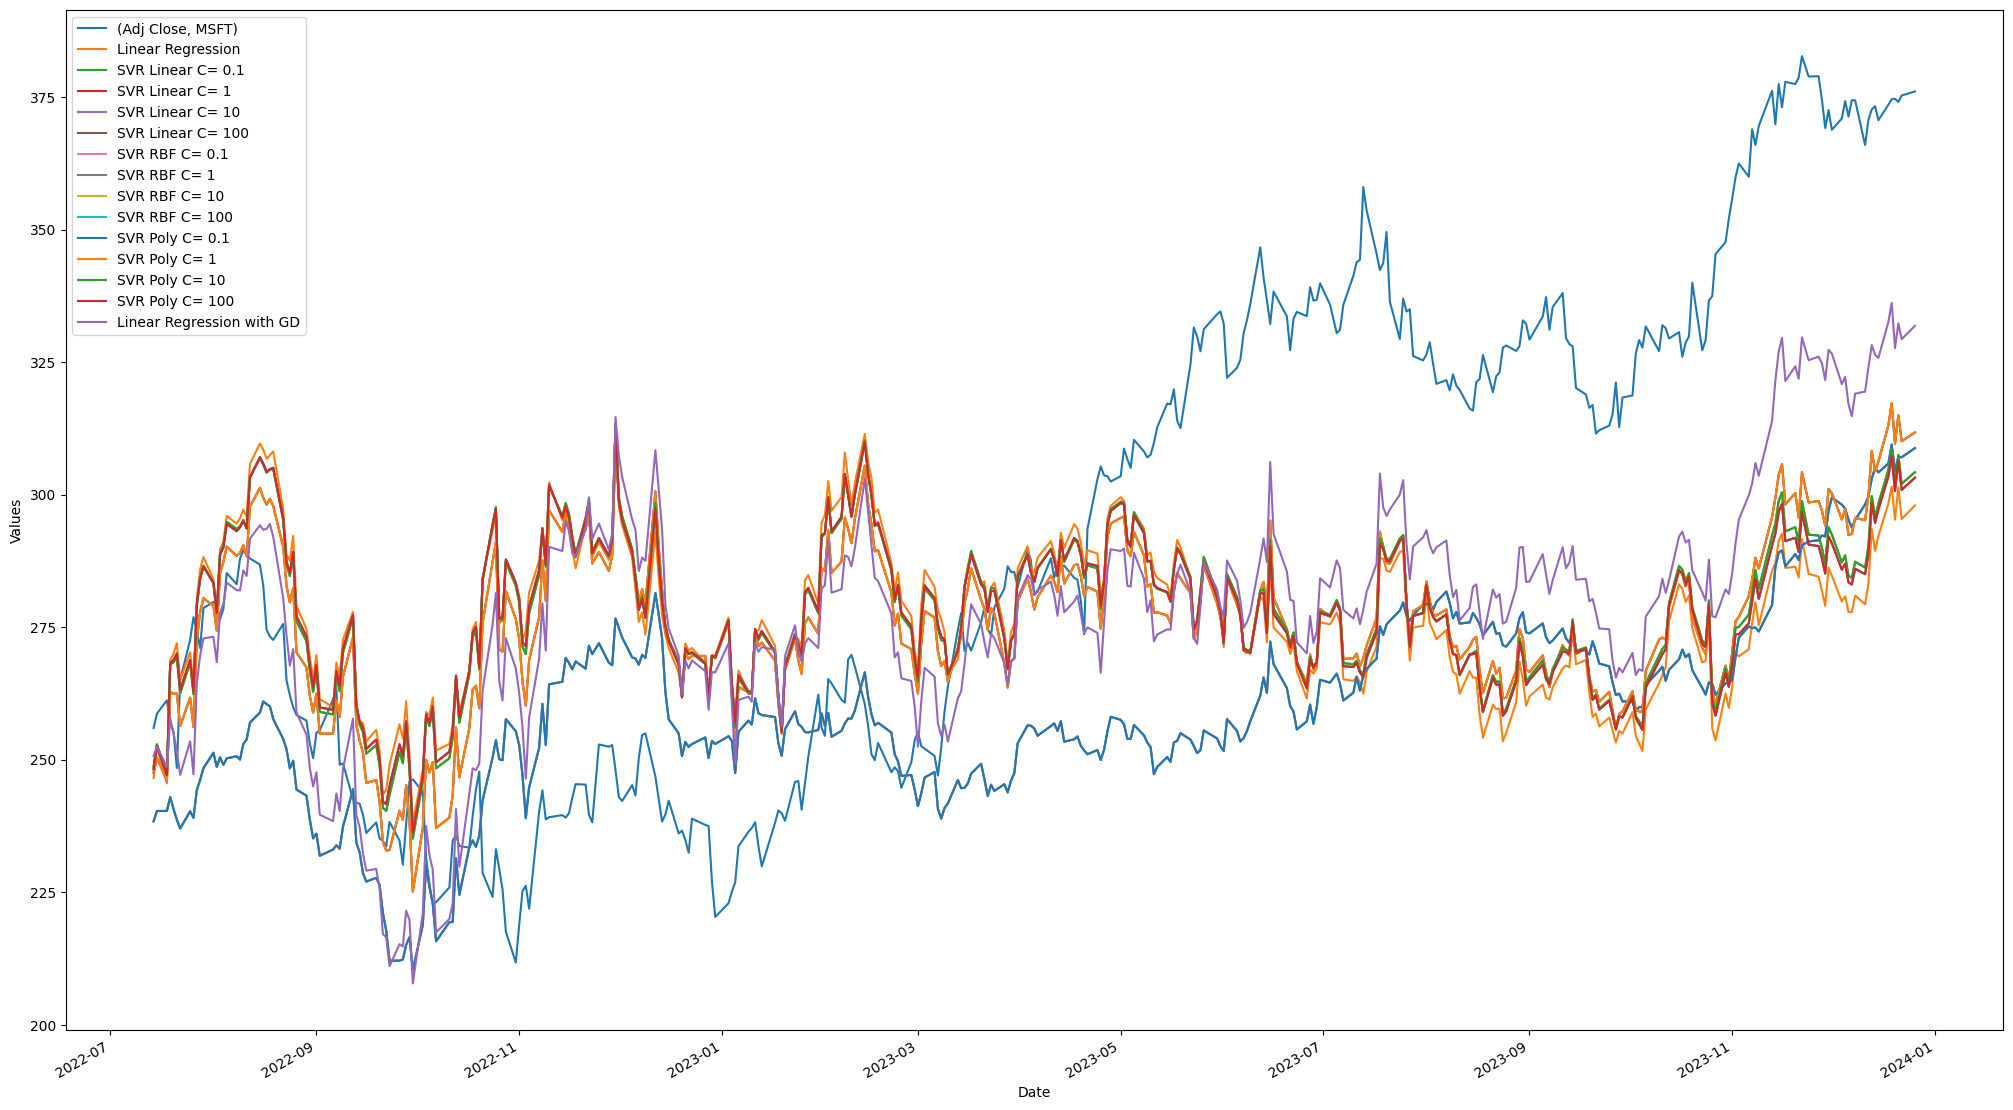

</details>


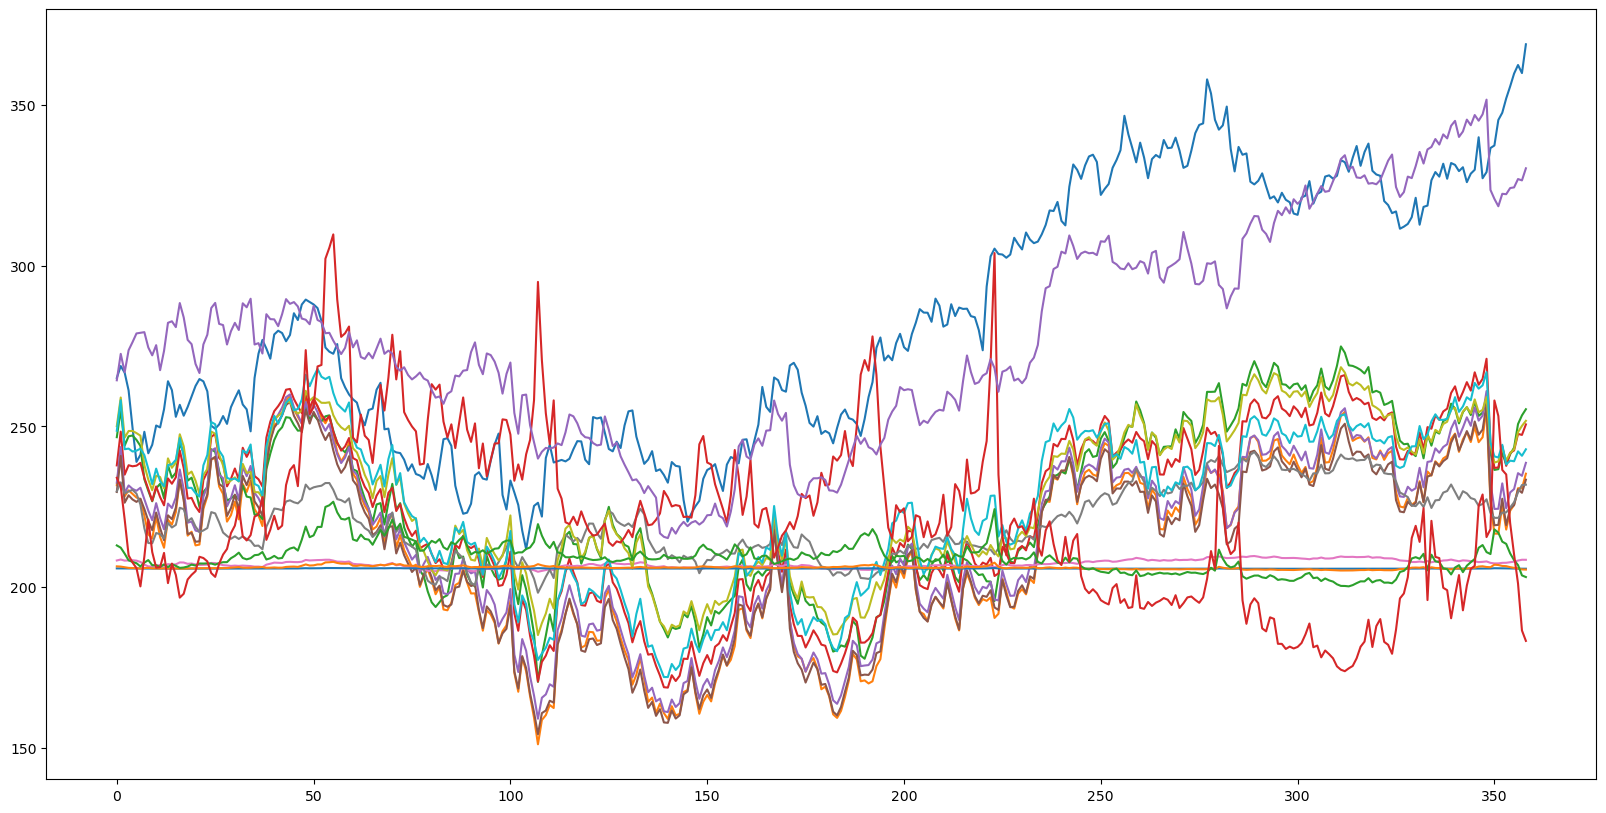

In [22]:
### START CODE HERE ###
#Plot the graph of y, y_prediction from all models
plt.figure(figsize=(20,10))
plt.plot(compare)


### END CODE HERE ###

### Question

1. Rank Top 3 Models with Best prediction (Best MSE)
2. What would be the reason for large error from 2023-05 to 2024-01?


In [23]:
# Ans